In [2]:
 ####### Setup
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cv2
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
while os.getcwd().split('\\')[-1] != 'ecological-networks':
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
global DATA_TYPE
DATA_TYPE = 'Real_2D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

def CASE_init(CASE_TO_SOLVE):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(DATA_TYPE)
    NetworkName_Solved_df = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_{DATA_TYPE.split('_')[0]}.pkl"))
    M = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"M_{DATA_TYPE.split('_')[0]}.pkl"))
    if DATA_TYPE.split('_')[0] == 'Syn':
        M = {k:M[k] for k in M.keys() if int(k.split('_')[2]) == 100}
    return DATA_TYPE, NetworkName_Solved_df, M

def init_HeatmapData(Case, Start = 0, End = -1):
    if End == -1:
        End = Start + 1
    if Case == 1:
        Heatmap01_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap01_{DATA_TYPE}.pkl"))
        return {k:Heatmap01_All[k][Start:End] for k in Heatmap01_All.keys()}
    if Case == 2:
        Heatmap02_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap02_{DATA_TYPE}.pkl"))
        return {k:Heatmap02_All[k][Start:End] for k in Heatmap02_All.keys()}
    if Case == 3:
        Heatmap03_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap03_{DATA_TYPE}.pkl"))
        return {k:Heatmap03_All[k][Start:End] for k in Heatmap03_All.keys()}

d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_2D


In [105]:
def get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_2D"):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_init(CASE_TO_SOLVE)

    if DATA_TYPE.split("_")[1] == '1D':
        Flag = [0,1,2,3,4]
    elif DATA_TYPE.split("_")[1] == '2D':
        Flag = [1,2,3,4]

    Strategy_Name = ['System','Degree','Closeness','Betweenness','Random']
    File_Lables = ['Data_three', 'Data_four', 'Data_five', 'Data_six', 'Data_rand']
    Flag_Strategy = {k:Strategy_Name[k] for k in Flag}

    Data = []
    Data_All = []
    for s in Flag:
        Data += [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"{DATA_TYPE}_Data", 'Averaged', NetworkName, f"{NetworkName}-{File_Lables[s]}.pkl"))]
        Data_All += [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"{DATA_TYPE}_Data", 'Averaged', NetworkName, f"{NetworkName}-{File_Lables[s]}_All.pkl"))]
    del s, File_Lables

    Key_Sequence = [
        (0,2,0), (0,5,0), (0,8,0),
        (1,2,0), (1,5,0), (1,8,0),
        (2,2,0), (2,5,0), (2,8,0)
        ]

    data = {}
    for s in range(len(Flag)):
        data[Flag[s]] = pd.DataFrame(columns = ['key', 'Var', 'Value'])
        for Var in ['Abundance', 'Resilience', 'Persistence']:
            for k in range(9):
                key = Key_Sequence[k]
                x = Data_All[s][key,0][Var].flatten()
                for v in x:
                    data[Flag[s]] = data[Flag[s]].append(pd.DataFrame([[k, Var, v]], columns = ['key', 'Var', 'Value']), ignore_index = True)
    del Var, k, key, x, v, s
    
    for s in Flag:
        data[s].loc[data[s].Var == 'Resilience', 'Value'] = (data[s].loc[data[s].Var == 'Resilience', 'Value'] - 0.0)/(300.0 - 0.0)
    
    if DATA_TYPE.split("_")[1] == '1D':
        for s in Flag:
            data[s].loc[data[s].Var == 'Abundance', 'Value'] = (data[s].loc[data[s].Var == 'Abundance', 'Value'] - 0.0)/(14.0 - 0.0)
    return data

# data = get_Plot_data(NetworkName = "M_PL_041", CASE_TO_SOLVE = "Real_1D")

In [3]:
M_Real = UnpickleObj(r"D:\Github\ecological-networks\Code\01_Species_Reintroductions\01_Simulation_Execution\M_Real.pkl")

In [106]:
D = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', 'Updating_Panels', 'strategy_performance_01.pkl'))
for NetworkName in tqdm(M_Real.keys()):
    M_df = M_Real[NetworkName]
    data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = "Real_2D")
    # D[NetworkName] = {}
    # D[NetworkName]['shape'] = M_df.shape
    for s in [2]:
        D[NetworkName][s] = {}
        for var in ['Abundance','Resilience','Persistence']:
            data_var_strategy = data[s].loc[data[s].Var == var]
            D[NetworkName][s][var] = {}
            for key in np.arange(9):
                D[NetworkName][s][var][key] = data_var_strategy.loc[data_var_strategy.key == key].Value

100%|██████████| 30/30 [19:07<00:00, 38.25s/it]


In [107]:
PickleObj(D, os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', 'Updating_Panels', 'strategy_performance_02.pkl'))

In [4]:
D = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', 'Updating_Panels', 'strategy_performance_02.pkl'))

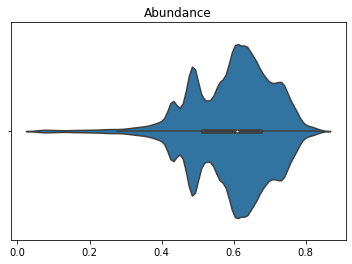

0.04282253000279947 0.8484852923826633


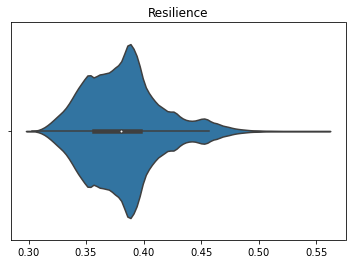

0.30333333333333334 0.5566666666666666


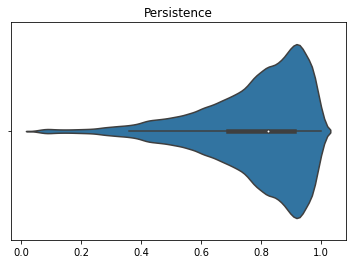

0.045454545454545456 1.0


In [108]:
D_span = {}
for var in ['Abundance','Resilience','Persistence']:
    var_values = [x for NetworkName in D.keys() for s in [1,2,3,4] for key in range(9) for x in D[NetworkName][s][var][key]]
    var_values = np.array(var_values).flatten()
    plt.figure()
    sns.violinplot(x = var_values)
    plt.title(var)
    plt.show()
    print(np.min(var_values),np.max(var_values))
    D_span[var] = [np.min(var_values),np.max(var_values)]

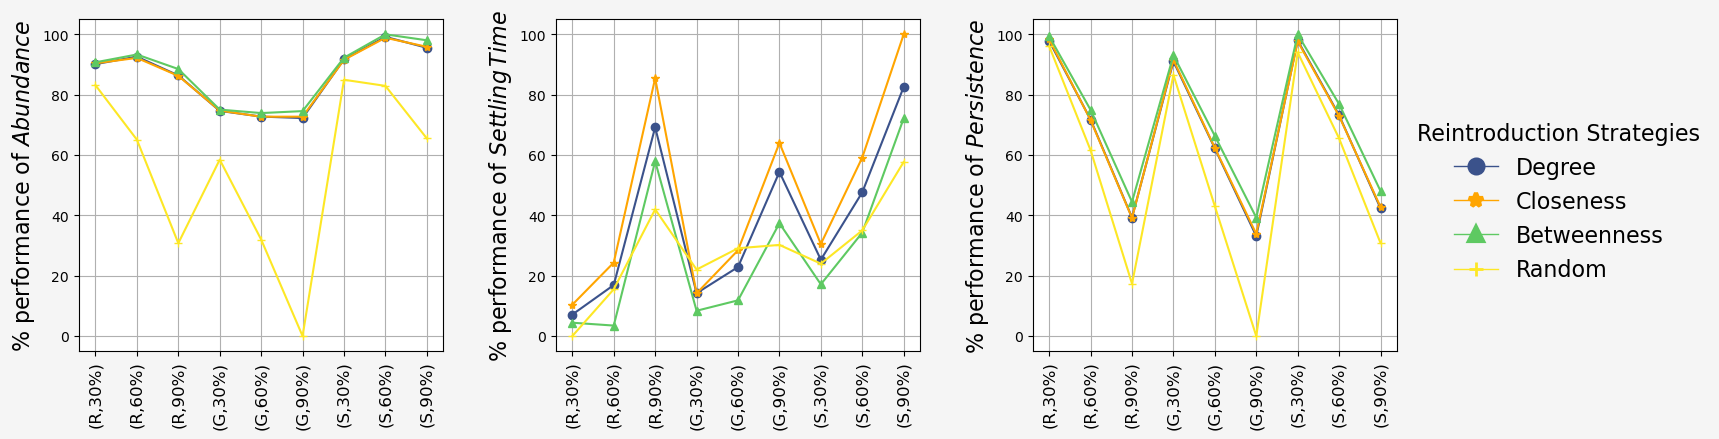

In [125]:
def single_network_performance(NetworkName, row, fig = None, ax = None):
    norm = mpl.colors.Normalize(vmin=0, vmax=4)
    cmap = {i:mpl.cm.viridis(norm(i)) if i != 2 else 'orange' for i in range(5)}
    cmap[5] = 'gray'
    if fig == None or ax == None:
        fig, ax = plt.subplots(1,3, figsize = (15,5), dpi = 100, facecolor = 'whitesmoke')
        fig.tight_layout(pad = 5)

    vals_x = lambda s: [np.mean(D[NetworkName][s]['Abundance'][key]) for key in range(9)]
    vals_x_lst = np.array([vals_x(s) for s in [1,2,3,4]])
    vals_x_plot = ((vals_x_lst - np.min(vals_x_lst)) / (np.max(vals_x_lst) - np.min(vals_x_lst)))*100

    vals_st = lambda s: [np.mean(D[NetworkName][s]['Resilience'][key]) for key in range(9)]
    vals_st_lst = np.array([vals_st(s) for s in [1,2,3,4]])
    vals_st_plot = ((np.max(vals_st_lst) - vals_st_lst) / (np.max(vals_st_lst) - np.min(vals_st_lst)))*100

    vals_p = lambda s: [np.mean(D[NetworkName][s]['Persistence'][key]) for key in range(9)]
    vals_p_lst = np.array([vals_p(s) for s in [1,2,3,4]])
    vals_p_plot = ((vals_p_lst - np.min(vals_p_lst)) / (np.max(vals_p_lst) - np.min(vals_p_lst)))*100


    ax[0].plot(np.arange(9),vals_x_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')
    ax[1].plot(np.arange(9),vals_st_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')
    ax[2].plot(np.arange(9),vals_p_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')

    ax[0].plot(np.arange(9),vals_x_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')
    ax[1].plot(np.arange(9),vals_st_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')
    ax[2].plot(np.arange(9),vals_p_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')

    ax[0].plot(np.arange(9),vals_x_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')
    ax[1].plot(np.arange(9),vals_st_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')
    ax[2].plot(np.arange(9),vals_p_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')

    ax[0].plot(np.arange(9),vals_x_plot[3,:], label = 'Random', c = cmap[4], marker = '+')
    ax[1].plot(np.arange(9),vals_st_plot[3,:], label = 'Random', c = cmap[4], marker = '+')
    ax[2].plot(np.arange(9),vals_p_plot[3,:], label = 'Random', c = cmap[4], marker = '+')

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    ax[0].set_xticks(np.arange(9))
    ax[0].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
    ax[1].set_xticks(np.arange(9))
    ax[1].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
    ax[2].set_xticks(np.arange(9))
    ax[2].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)

    ax[0].set_ylabel(r'% performance of $Abundance$', fontsize = 16)
    ax[1].set_ylabel(r'% performance of $Settling \, Time$', fontsize = 16)
    ax[2].set_ylabel(r'% performance of $Persistence$', fontsize = 16)

    legend_elements = [
        Line2D([0,1], [0,1], color = cmap[1], label = 'Degree', linewidth = 1, marker = 'o', markeredgewidth=3, markersize=10),
        Line2D([0,1], [0,1], color = cmap[2], label = 'Closeness', linewidth = 1, marker = '*', markeredgewidth=3, markersize=10),
        Line2D([0,1], [0,1], color = cmap[3], label = 'Betweenness', linewidth = 1, marker = '^', markeredgewidth=3, markersize=10),
        Line2D([0,1], [0,1], color = cmap[4], label = 'Random', linewidth = 1, marker = '+', markeredgewidth=2, markersize=10),
        ]
    l1 = ax[2].legend(handles=legend_elements, bbox_to_anchor = [1.0,0.15], loc = 'lower left', title = 'Reintroduction Strategies', fontsize = 16, frameon = False, ncol = 1)
    l1.get_title().set_fontsize(16)

    plt.show()

single_network_performance(NetworkName = 'M_PL_041')

In [ ]:
def single_network_performance(NetworkName, row, fig = None, ax = None):
    norm = mpl.colors.Normalize(vmin=0, vmax=4)
    cmap = {i:mpl.cm.viridis(norm(i)) if i != 2 else 'orange' for i in range(5)}
    cmap[5] = 'gray'

    vals_x = lambda s: [np.mean(D[NetworkName][s]['Abundance'][key]) for key in range(9)]
    vals_x_lst = np.array([vals_x(s) for s in [1,2,3,4]])
    vals_x_plot = ((vals_x_lst - np.min(vals_x_lst)) / (np.max(vals_x_lst) - np.min(vals_x_lst)))*100

    vals_st = lambda s: [np.mean(D[NetworkName][s]['Resilience'][key]) for key in range(9)]
    vals_st_lst = np.array([vals_st(s) for s in [1,2,3,4]])
    vals_st_plot = ((np.max(vals_st_lst) - vals_st_lst) / (np.max(vals_st_lst) - np.min(vals_st_lst)))*100

    vals_p = lambda s: [np.mean(D[NetworkName][s]['Persistence'][key]) for key in range(9)]
    vals_p_lst = np.array([vals_p(s) for s in [1,2,3,4]])
    vals_p_plot = ((vals_p_lst - np.min(vals_p_lst)) / (np.max(vals_p_lst) - np.min(vals_p_lst)))*100


    ax[row,0].plot(np.arange(9),vals_x_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')
    ax[row,1].plot(np.arange(9),vals_st_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')
    ax[row,2].plot(np.arange(9),vals_p_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o')

    ax[row,0].plot(np.arange(9),vals_x_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')
    ax[row,1].plot(np.arange(9),vals_st_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')
    ax[row,2].plot(np.arange(9),vals_p_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*')

    ax[row,0].plot(np.arange(9),vals_x_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')
    ax[row,1].plot(np.arange(9),vals_st_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')
    ax[row,2].plot(np.arange(9),vals_p_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^')

    ax[row,0].plot(np.arange(9),vals_x_plot[3,:], label = 'Random', c = cmap[4], marker = '+')
    ax[row,1].plot(np.arange(9),vals_st_plot[3,:], label = 'Random', c = cmap[4], marker = '+')
    ax[row,2].plot(np.arange(9),vals_p_plot[3,:], label = 'Random', c = cmap[4], marker = '+')

    ax[row,0].grid()
    ax[row,1].grid()
    ax[row,2].grid()

    ax[row,0].set_ylabel(f'% performance\n({NetworkName})', fontsize = 14, weight = 'bold')

    if row == 0:
        ax[row,0].set_title('Abundance\n', fontsize = 16, weight = 'bold', fontstyle = 'italic')
        ax[row,1].set_title('Settling Time\n', fontsize = 16, weight = 'bold', fontstyle = 'italic')
        ax[row,2].set_title('Persistence\n', fontsize = 16, weight = 'bold', fontstyle = 'italic')

    ax[row,0].set_xticks(np.arange(9))
    ax[row,0].set_xticklabels([])
    ax[row,1].set_xticks(np.arange(9))
    ax[row,1].set_xticklabels([])
    ax[row,2].set_xticks(np.arange(9))
    ax[row,2].set_xticklabels([])
    
    ax[row, 0].set_facecolor('none')
    ax[row, 1].set_facecolor('none')
    ax[row, 2].set_facecolor('none')

    if row == 14:
        ax[row,0].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
        ax[row,1].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
        ax[row,2].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)

    # legend_elements = [
    #     Line2D([0,1], [0,1], color = cmap[1], label = 'Degree', linewidth = 1, marker = 'o', markeredgewidth=3, markersize=10),
    #     Line2D([0,1], [0,1], color = cmap[2], label = 'Closeness', linewidth = 1, marker = '*', markeredgewidth=3, markersize=10),
    #     Line2D([0,1], [0,1], color = cmap[3], label = 'Betweenness', linewidth = 1, marker = '^', markeredgewidth=3, markersize=10),
    #     Line2D([0,1], [0,1], color = cmap[4], label = 'Random', linewidth = 1, marker = '+', markeredgewidth=2, markersize=10),
    #     ]
    # l1 = ax[2].legend(handles=legend_elements, bbox_to_anchor = [1.0,0.15], loc = 'lower left', title = 'Reintroduction Strategies', fontsize = 16, frameon = False, ncol = 1)
    # l1.get_title().set_fontsize(16)


N = 15
fig, ax = plt.subplots(N,3, figsize = (10, 50), dpi = 300, facecolor = 'none', sharex = 'col', sharey = 'row')
fig.tight_layout(pad = 1)

for row, NetworkName in itertools.islice(enumerate(D.keys()),15,None,1):
    single_network_performance(NetworkName = NetworkName, row = row%15, fig = fig, ax = ax)

plt.show()

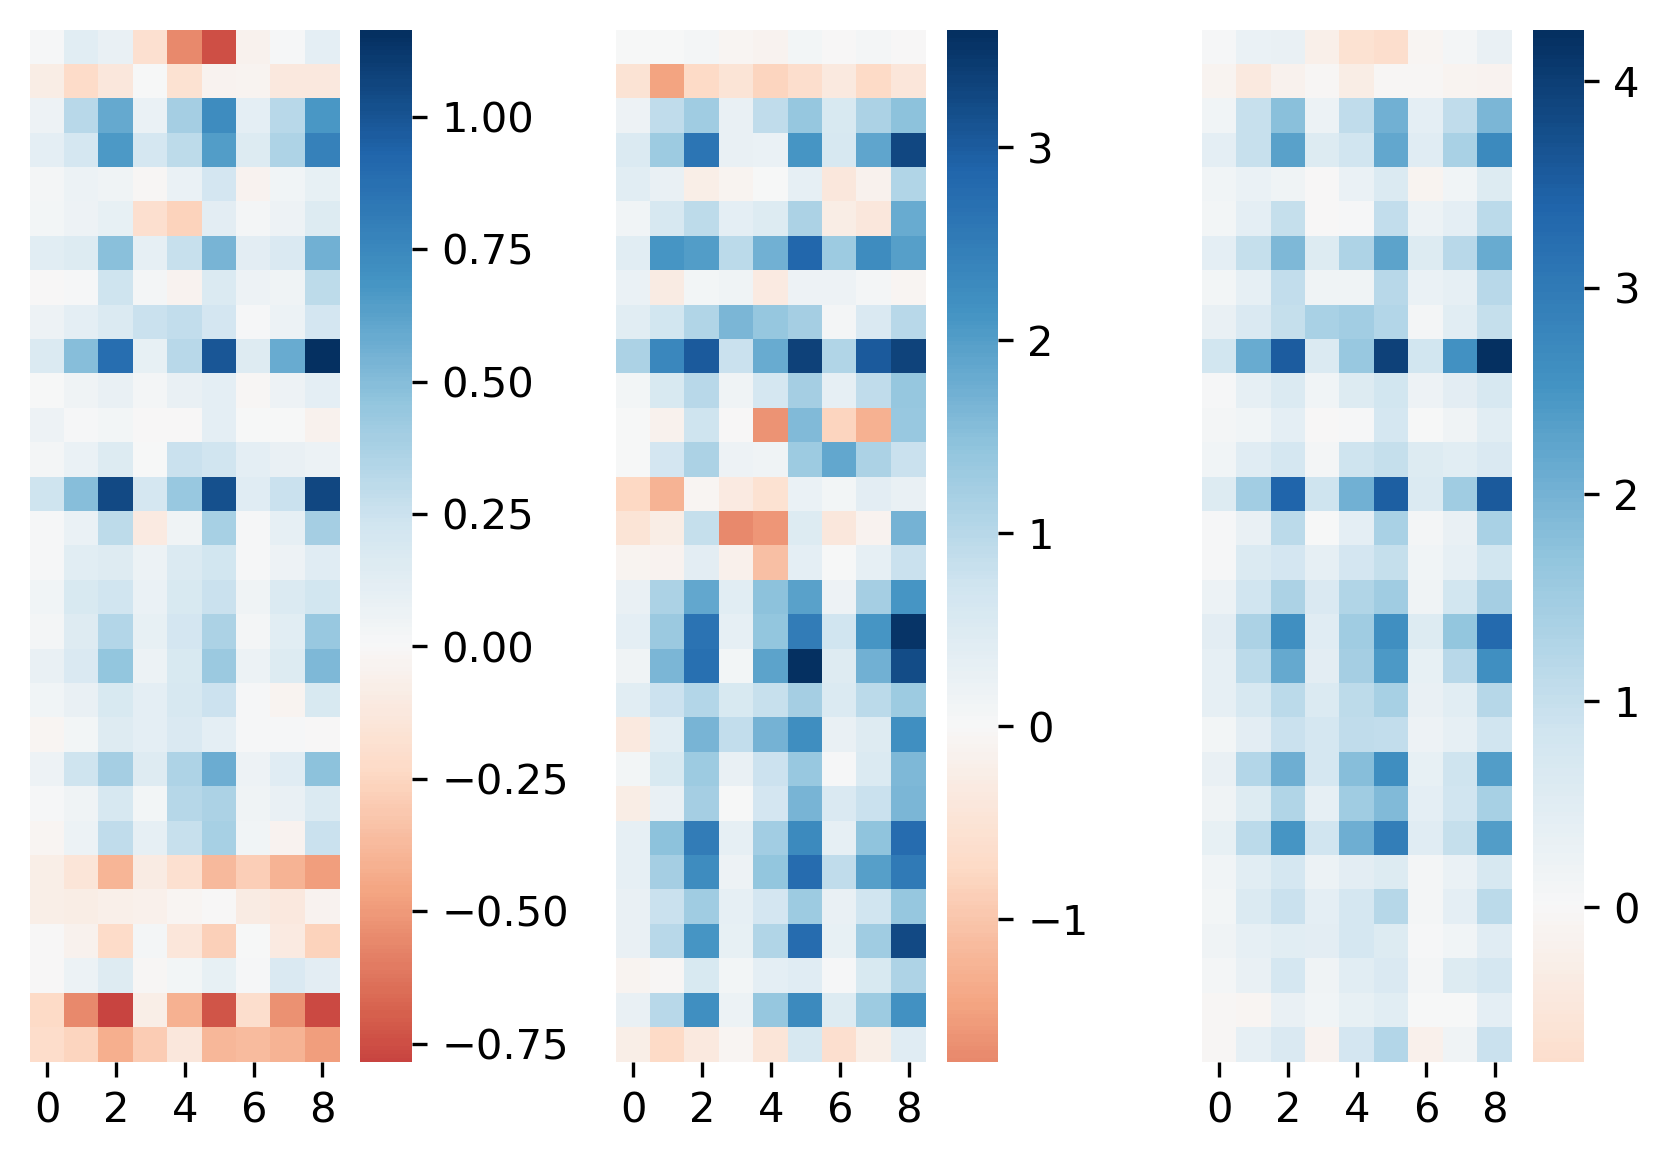

In [5]:
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        rel_strategy_performance[row, col] = (np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][1][var][key])/D[NetworkName][3][var][key]))*100

# sns.heatmap(
#     rel_strategy_performance*100, 
#     cmap = 'rainbow_r', 
#     linecolor = 'gray', 
#     linewidths=1, 
#     cbar_kws={'label':r'$\frac{betweenness - degree}{betweenness} \times 100$ (in %)'}
#     )
fig, ax = plt.subplots(1,3, dpi = 300)
fig.tight_layout(pad = 1)
sns.heatmap(rel_strategy_performance[:,0:9], ax = ax[0], square = True, cmap = 'RdBu', center = 0.0)
sns.heatmap(rel_strategy_performance[:,9:18], ax = ax[1], square = True, cmap = 'RdBu', center = 0.0)
sns.heatmap(rel_strategy_performance[:,18:27], ax = ax[2], square = True, cmap = 'RdBu', center = 0.0)
for a in ax:
    a.set_yticks([])


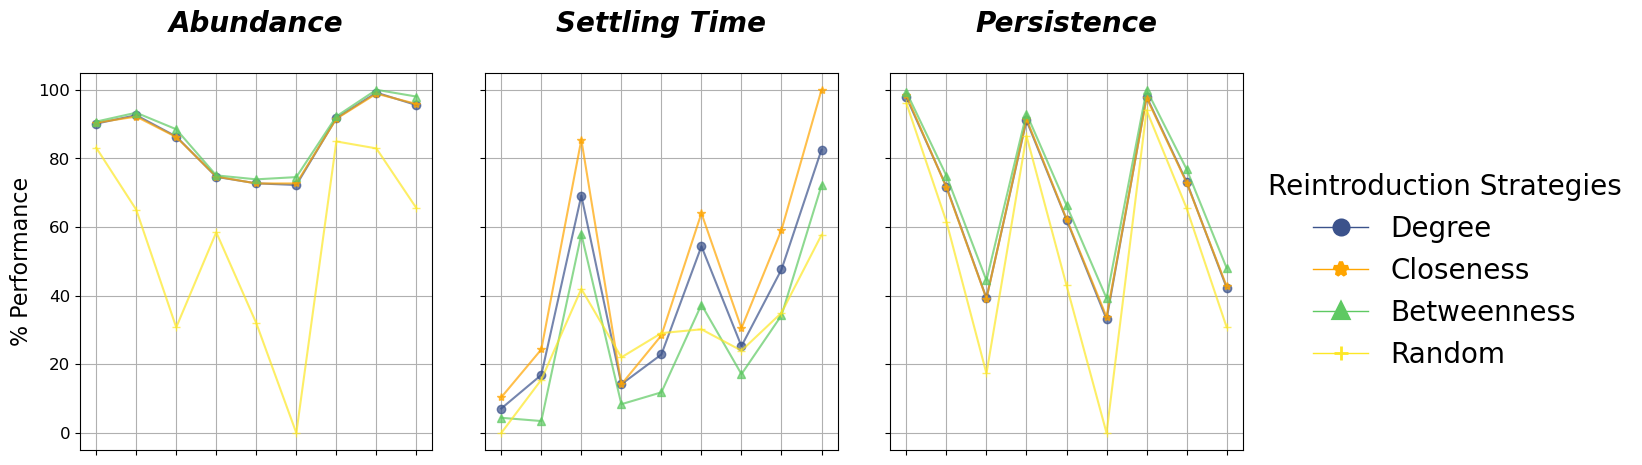

In [115]:
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cmap = {i:mpl.cm.viridis(norm(i)) if i != 2 else 'orange' for i in range(5)}
cmap[5] = 'gray'

NetworkName = 'M_PL_041'
fig, ax = plt.subplots(1,3, figsize = (15,5), dpi = 100, facecolor = 'none', sharey = 'row', sharex = 'col')
# fig.tight_layout(pad = 5)
fig.subplots_adjust(hspace=0, wspace=0.15)
vals_x = lambda s: [np.mean(D[NetworkName][s]['Abundance'][key]) for key in range(9)]
vals_x_lst = np.array([vals_x(s) for s in [1,2,3,4]])
vals_x_plot = ((vals_x_lst - np.min(vals_x_lst)) / (np.max(vals_x_lst) - np.min(vals_x_lst)))*100

vals_st = lambda s: [np.mean(D[NetworkName][s]['Resilience'][key]) for key in range(9)]
vals_st_lst = np.array([vals_st(s) for s in [1,2,3,4]])
vals_st_plot = ((np.max(vals_st_lst) - vals_st_lst) / (np.max(vals_st_lst) - np.min(vals_st_lst)))*100

vals_p = lambda s: [np.mean(D[NetworkName][s]['Persistence'][key]) for key in range(9)]
vals_p_lst = np.array([vals_p(s) for s in [1,2,3,4]])
vals_p_plot = ((vals_p_lst - np.min(vals_p_lst)) / (np.max(vals_p_lst) - np.min(vals_p_lst)))*100

ax[0].plot(np.arange(9),vals_x_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o', alpha = 0.7)
ax[1].plot(np.arange(9),vals_st_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o', alpha = 0.7)
ax[2].plot(np.arange(9),vals_p_plot[0,:], label = 'Degree', c = cmap[1], marker = 'o', alpha = 0.7)

ax[0].plot(np.arange(9),vals_x_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*', alpha = 0.7)
ax[1].plot(np.arange(9),vals_st_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*', alpha = 0.7)
ax[2].plot(np.arange(9),vals_p_plot[1,:], label = 'Closeness', c = cmap[2], marker = '*', alpha = 0.7)

ax[0].plot(np.arange(9),vals_x_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^', alpha = 0.7)
ax[1].plot(np.arange(9),vals_st_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^', alpha = 0.7)
ax[2].plot(np.arange(9),vals_p_plot[2,:], label = 'Betweenness', c = cmap[3], marker = '^', alpha = 0.7)

ax[0].plot(np.arange(9),vals_x_plot[3,:], label = 'Random', c = cmap[4], marker = '+', alpha = 0.7)
ax[1].plot(np.arange(9),vals_st_plot[3,:], label = 'Random', c = cmap[4], marker = '+', alpha = 0.7)
ax[2].plot(np.arange(9),vals_p_plot[3,:], label = 'Random', c = cmap[4], marker = '+', alpha = 0.7)

ax[0].set_ylabel(r'% Performance', fontsize = 16)

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xticks(np.arange(9))
ax[0].set_xticklabels([])
# ax[0].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
ax[1].set_xticks(np.arange(9))
ax[1].set_xticklabels([])
# ax[1].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
ax[2].set_xticks(np.arange(9))
ax[2].set_xticklabels([])
# ax[2].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 12)
ax[0].set_yticks(np.arange(0,101,20))
ax[0].set_yticklabels([int(x) for x in np.arange(0,101,20)], fontsize = 12)
# ax[1].set_xlabel('Perturbation Scenario', fontsize = 16)

legend_elements = [
    Line2D([0,1], [0,1], color = cmap[1], label = 'Degree', linewidth = 1, marker = 'o', markeredgewidth=3, markersize=10),
    Line2D([0,1], [0,1], color = cmap[2], label = 'Closeness', linewidth = 1, marker = '*', markeredgewidth=3, markersize=10),
    Line2D([0,1], [0,1], color = cmap[3], label = 'Betweenness', linewidth = 1, marker = '^', markeredgewidth=3, markersize=10),
    Line2D([0,1], [0,1], color = cmap[4], label = 'Random', linewidth = 1, marker = '+', markeredgewidth=2, markersize=10),
    ]
l1 = ax[2].legend(handles=legend_elements, bbox_to_anchor = [1.0,0.15], loc = 'lower left', title = 'Reintroduction Strategies', fontsize = 20, frameon = False, ncol = 1)
l1.get_title().set_fontsize(20)

ax[0].set_title('Abundance\n', fontsize = 20, weight = 'bold', fontstyle = 'italic')
ax[1].set_title('Settling Time\n', fontsize = 20, weight = 'bold', fontstyle = 'italic')
ax[2].set_title('Persistence\n', fontsize = 20, weight = 'bold', fontstyle = 'italic')

ax[0].set_facecolor('none')
ax[1].set_facecolor('none')
ax[2].set_facecolor('none')

plt.show()

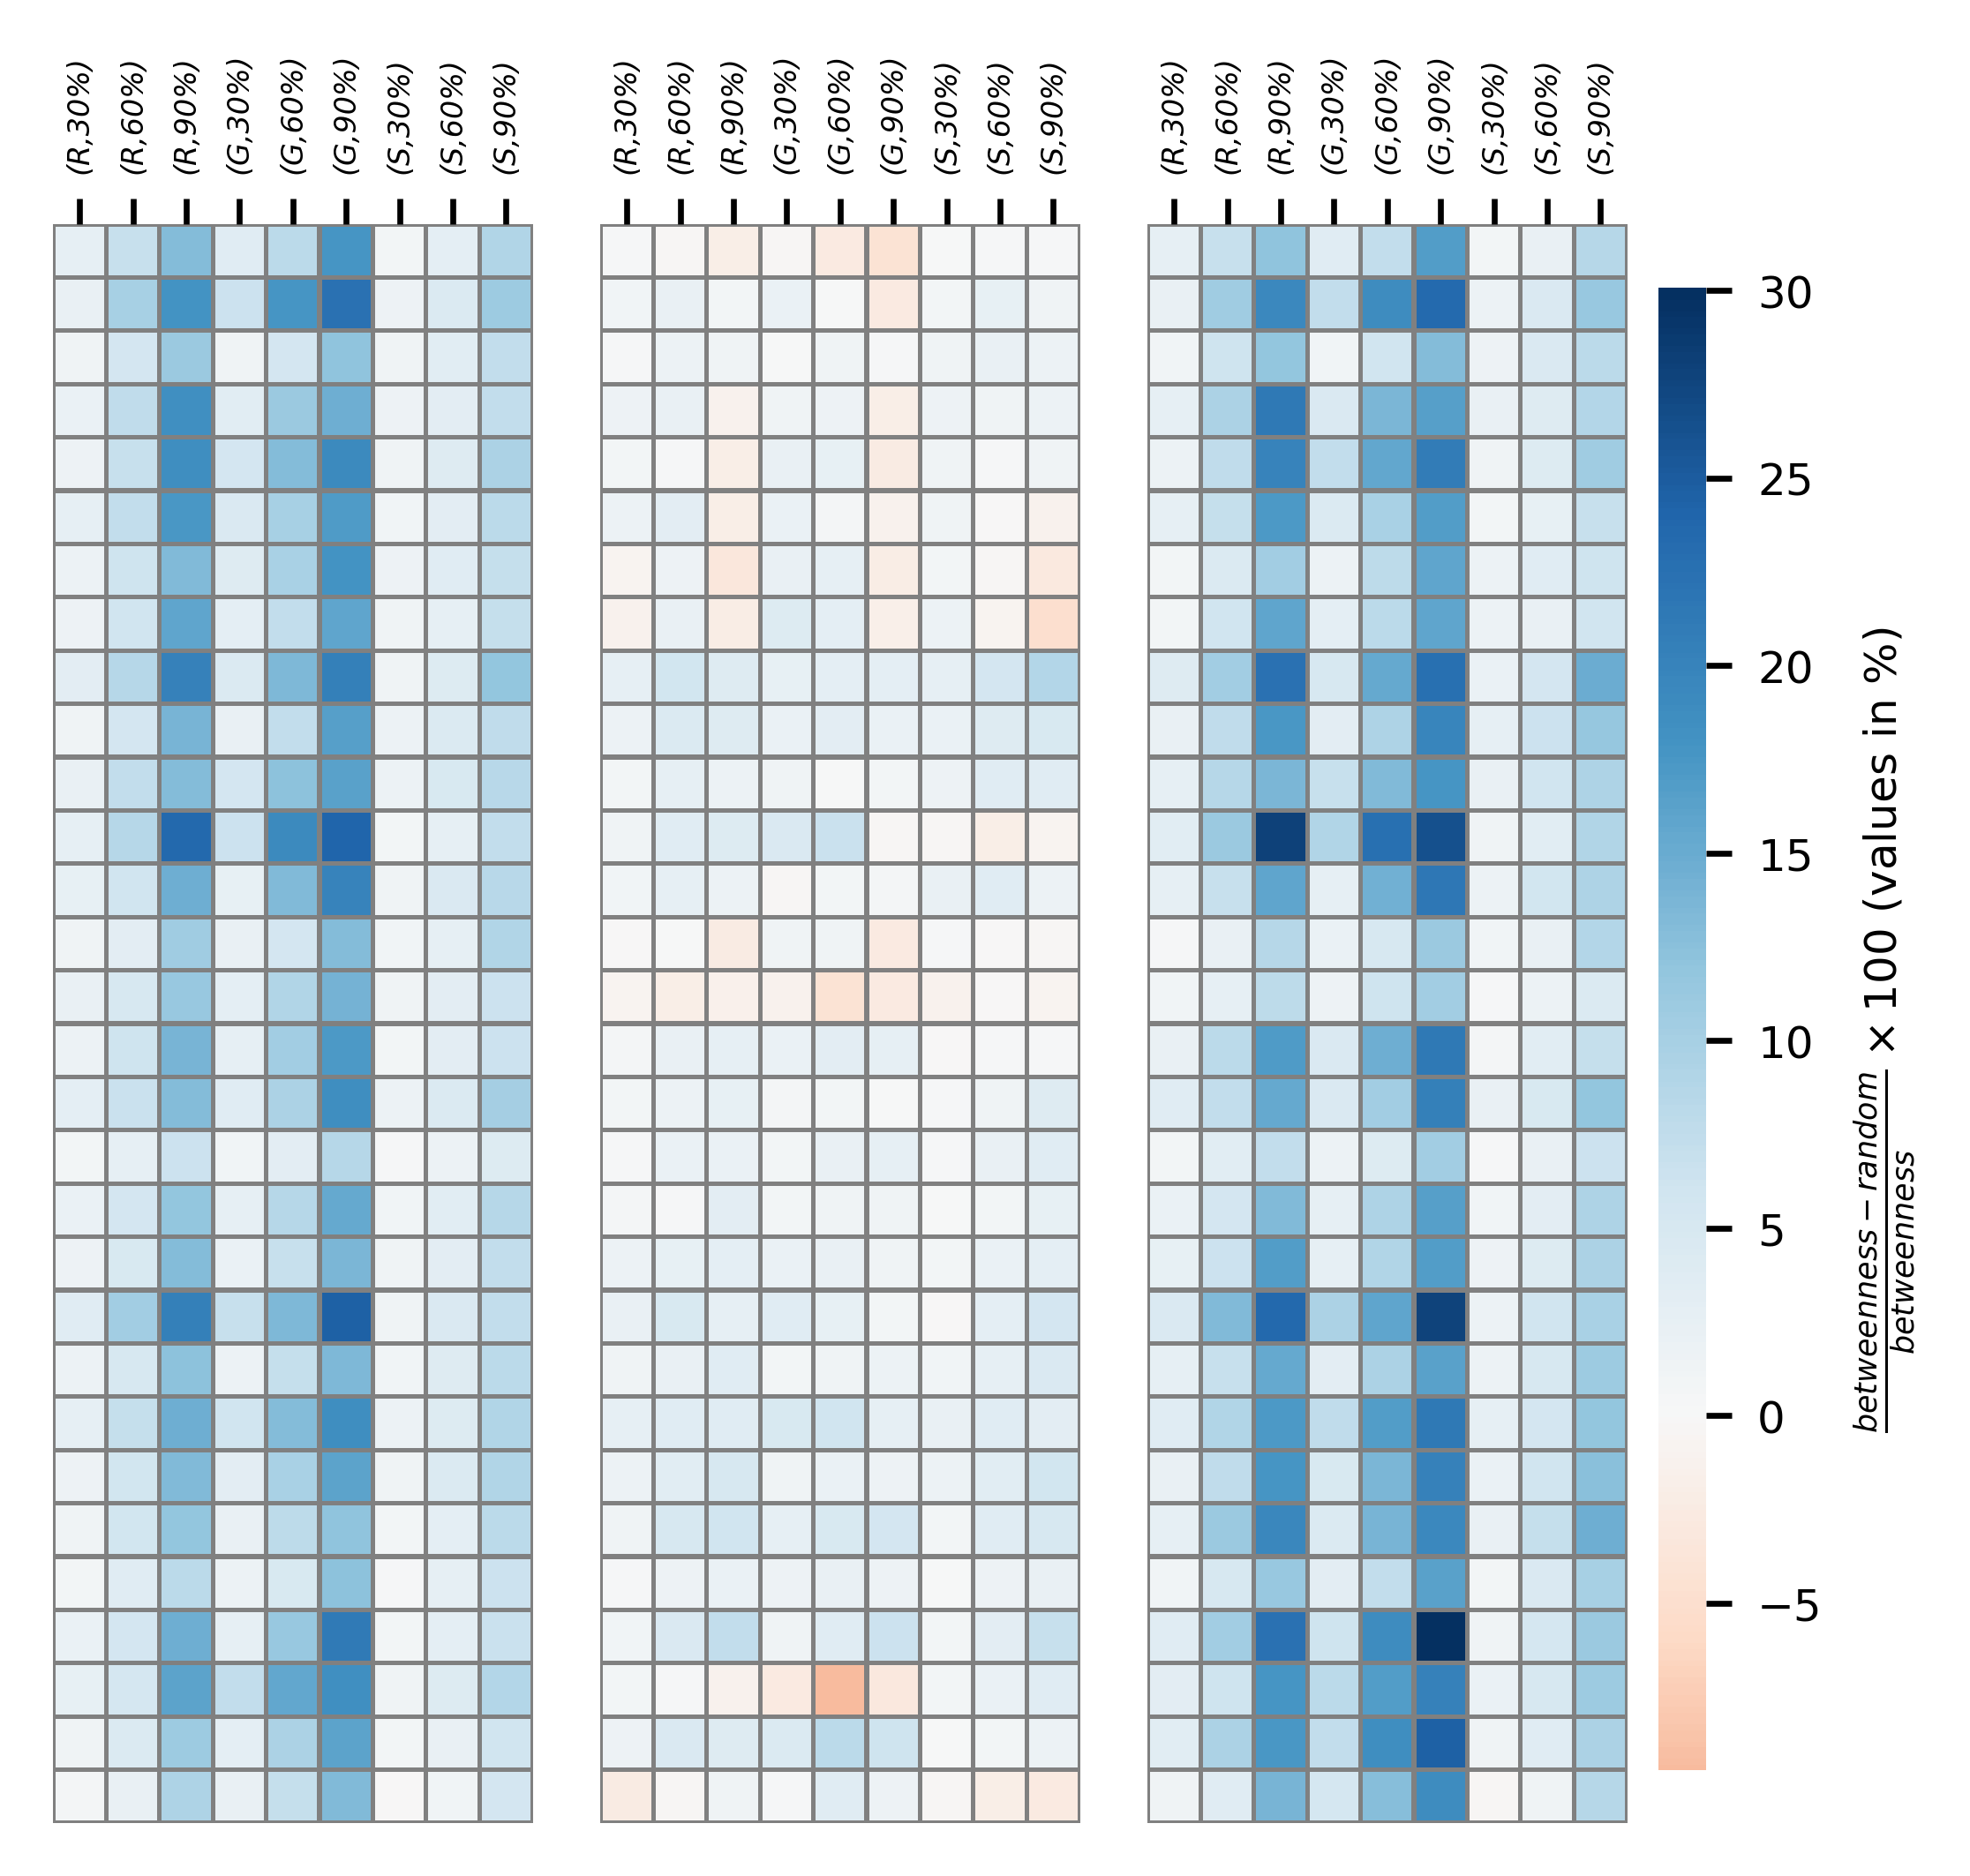

In [146]:
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        rel_strategy_performance[row, col] = (np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][4][var][key])/D[NetworkName][3][var][key]))*100
        
fig, ax = plt.subplots(1,3,dpi = 600, facecolor = 'none')
# fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=-0.60)
cbar_ax = fig.add_axes([0.77, 0.15, 0.015, 0.70])
for i in range(3):
    g = sns.heatmap(
        rel_strategy_performance[:,9*i:9*(i+1)], 
        square = True, 
        cmap = 'RdBu', 
        center = 0.0, 
        ax = ax[i], 
        vmin = np.min(rel_strategy_performance),
        vmax = np.max(rel_strategy_performance),
        linecolor = 'gray', 
        linewidths=0.5,
        cbar_ax=cbar_ax,
        cbar_kws={
            'orientation':'vertical',
            'label':r'$\frac{betweenness - random}{betweenness} \times $100 (values in %)',
            }
        )
    ax[i].set_yticks([])
    # ax[i].set_xticks([])
    ax[i].set_xticks(np.arange(9)+0.5)
    ax[i].set_xticklabels([f"({xx},{yy}%)" for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 4, fontstyle = 'italic')
    ax[i].xaxis.tick_top()
cbar_ax.tick_params(labelsize = 6)
g.figure.axes[-1].yaxis.label.set_size(6)

plt.show()

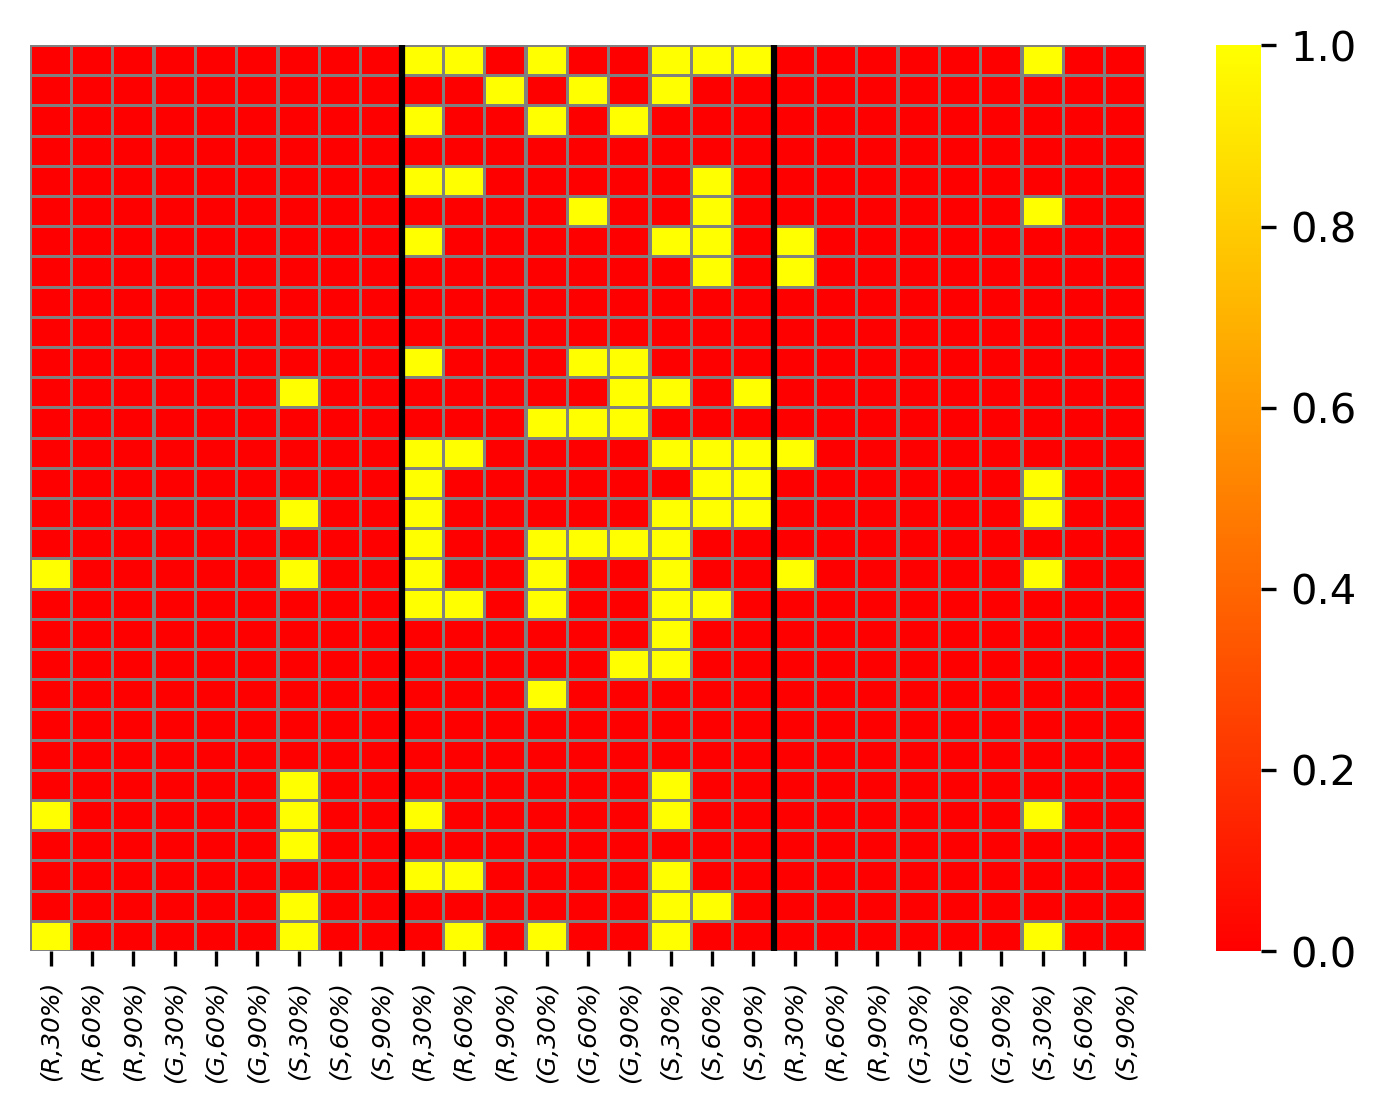

In [135]:
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        rel_strategy_performance[row, col] = (np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][4][var][key])/D[NetworkName][3][var][key]))*100

rows, cols = np.where(abs(rel_strategy_performance) <= 1)
temp = np.zeros((30,27))
temp[rows, cols] = 1
plt.figure(dpi = 300)
ax = plt.gca()
sns.heatmap(temp, cmap = 'autumn', linecolor='gray', linewidths=0.5, ax = ax)
plt.axvline(9, c = 'k')
plt.axvline(18, c = 'k')
ax.set_xticks(np.arange(27)+0.5)
ax.set_yticks([])
ax.set_xticklabels([f"({xx},{yy}%)" for _ in range(3) for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 6, fontstyle = 'italic')
plt.show()

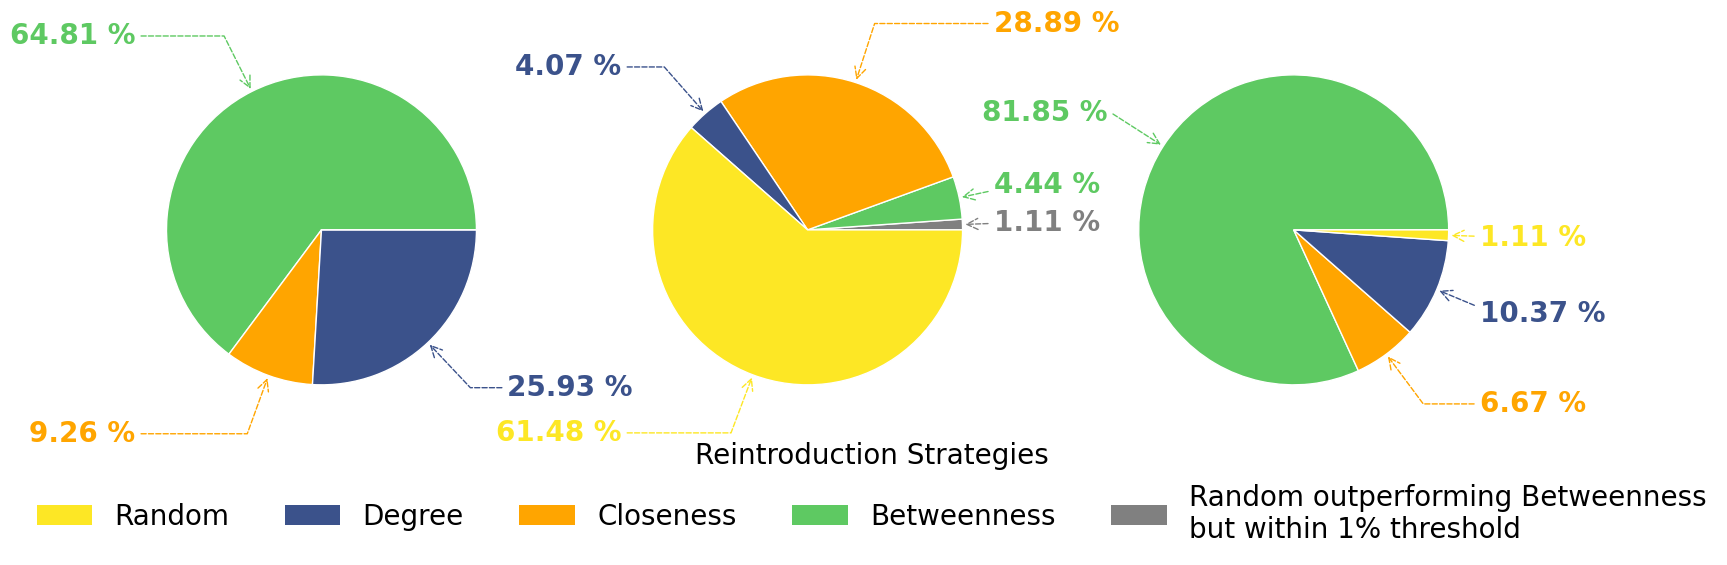

In [145]:
import matplotlib as mpl
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        rel_strategy_performance[row, col] = (np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][4][var][key])/D[NetworkName][3][var][key]))*100

def per_threshold(var, threshold = 1.0):
     X = [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Final_Mask_Per_Real_1D.pkl')),
          UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Final_Mask_Per_Real_2D.pkl'))]

     _, X_2d = X

     X_2d = X_2d[:,9*var:9*(var+1)]
     rows, cols = np.where(abs(rel_strategy_performance) <= threshold)
     mask = set([(rows[i],cols[i]) for i in range(len(rows))])

     # cnt = 0
     for row in range(30):
          for col in range(9):
               if (row,col) in mask:
                    if X_2d[row, col] in [4]:
                         X_2d[row, col] = 5
                         # cnt += 1
     # print(cnt)
     unique, counts = np.unique(X_2d, return_counts=True)
     X_2d_var = {i: counts[np.where(unique == i)[0][0]] if i in unique else 0 for i in range(6)}
     return X_2d_var

fig, ax = plt.subplots(1,3,figsize = (15,5), dpi = 100, facecolor = 'none')
fig.tight_layout(pad = 3)
# X_2d_var = per_threshold(0, 1.0) # [1.0, 0.5, 0.25, 0.1]
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cmap = {i:mpl.cm.viridis(norm(i)) if i != 2 else 'orange' for i in range(5)}
cmap[5] = 'gray'
# key_order = [1,2,3,5,4]
key_order = [5, 3, 2, 1, 4]
# V = 2
size = 0.2
prop_val_threshold = 0

X_2d_var = per_threshold(0, 1.0)
wedges, texts = ax[0].pie(
     [X_2d_var[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1,
     wedgeprops = dict(edgecolor = 'w'),
     # labeldistance = 0.7,
    )
kw = dict(arrowprops=dict(arrowstyle="->"), va="center", fontsize = 20, weight = 'bold')
for p, label, k in zip(wedges, [X_2d_var[i] for i in key_order], key_order):
    prop_val = 100*(label/sum([X_2d_var[i] for i in key_order]))
    if prop_val > prop_val_threshold:
        ang = (p.theta1 + p.theta2)/2
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle, 'color':cmap[k], 'linestyle': 'dashed', 'linewidth':1})
        ax[0].annotate(
            f"{round(prop_val,2)} %", 
            xy=(x, y), 
            xytext=(1.2*np.sign(x), 1.4*y),
            horizontalalignment=horizontalalignment, 
            color = cmap[k],
            **kw)

X_2d_var = per_threshold(1, 1.0)
wedges, texts = ax[1].pie(
     [X_2d_var[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1,
     wedgeprops = dict(edgecolor = 'w'),
     # labeldistance = 0.7,
    )
kw = dict(arrowprops=dict(arrowstyle="->"), va="center", fontsize = 20, weight = 'bold')
for p, label, k in zip(wedges, [X_2d_var[i] for i in key_order], key_order):
    prop_val = 100*(label/sum([X_2d_var[i] for i in key_order]))
    if prop_val > prop_val_threshold:
        ang = (p.theta1 + p.theta2)/2
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle, 'color':cmap[k], 'linestyle': 'dashed', 'linewidth':1})
        ax[1].annotate(
            f"{round(prop_val,2)} %", 
            xy=(x, y), 
            xytext=(1.2*np.sign(x), 1.4*y),
            horizontalalignment=horizontalalignment, 
            color = cmap[k],
            **kw)

X_2d_var = per_threshold(2, 1.0)
wedges, texts = ax[2].pie(
     [X_2d_var[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1,
     wedgeprops = dict(edgecolor = 'w'),
     # labeldistance = 0.7,
    )
kw = dict(arrowprops=dict(arrowstyle="->"), va="center", fontsize = 20, weight = 'bold')
for p, label, k in zip(wedges, [X_2d_var[i] for i in key_order], key_order):
    prop_val = 100*(label/sum([X_2d_var[i] for i in key_order]))
    if prop_val > prop_val_threshold:
        ang = (p.theta1 + p.theta2)/2
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle, 'color':cmap[k], 'linestyle': 'dashed', 'linewidth':1})
        ax[2].annotate(
            f"{round(prop_val,2)} %", 
            xy=(x, y), 
            xytext=(1.2*np.sign(x), 1.4*y),
            horizontalalignment=horizontalalignment, 
            color = cmap[k],
            **kw)

legend_elements = [
     Patch(facecolor=cmap[4], label='Random'),
     Patch(facecolor=cmap[1], label='Degree'),
     Patch(facecolor=cmap[2], label='Closeness'),
     Patch(facecolor=cmap[3], label='Betweenness'),
     Patch(facecolor=cmap[5], label='Random outperforming Betweenness'+'\n'+'but within 1% threshold')
    ]
l1 = ax[0].legend(handles=legend_elements, bbox_to_anchor = [-0.3,-0.375], loc = 'lower left', title = 'Reintroduction Strategies', fontsize = 20, frameon = False, ncol = 5)
l1.get_title().set_fontsize(20)

ax[0].set_facecolor('none')
ax[1].set_facecolor('none')
ax[2].set_facecolor('none')
plt.show()

# 241 70
# 223 66
# 182 60
# 104 42


Text(0.5, 1.0, 'Persistence')

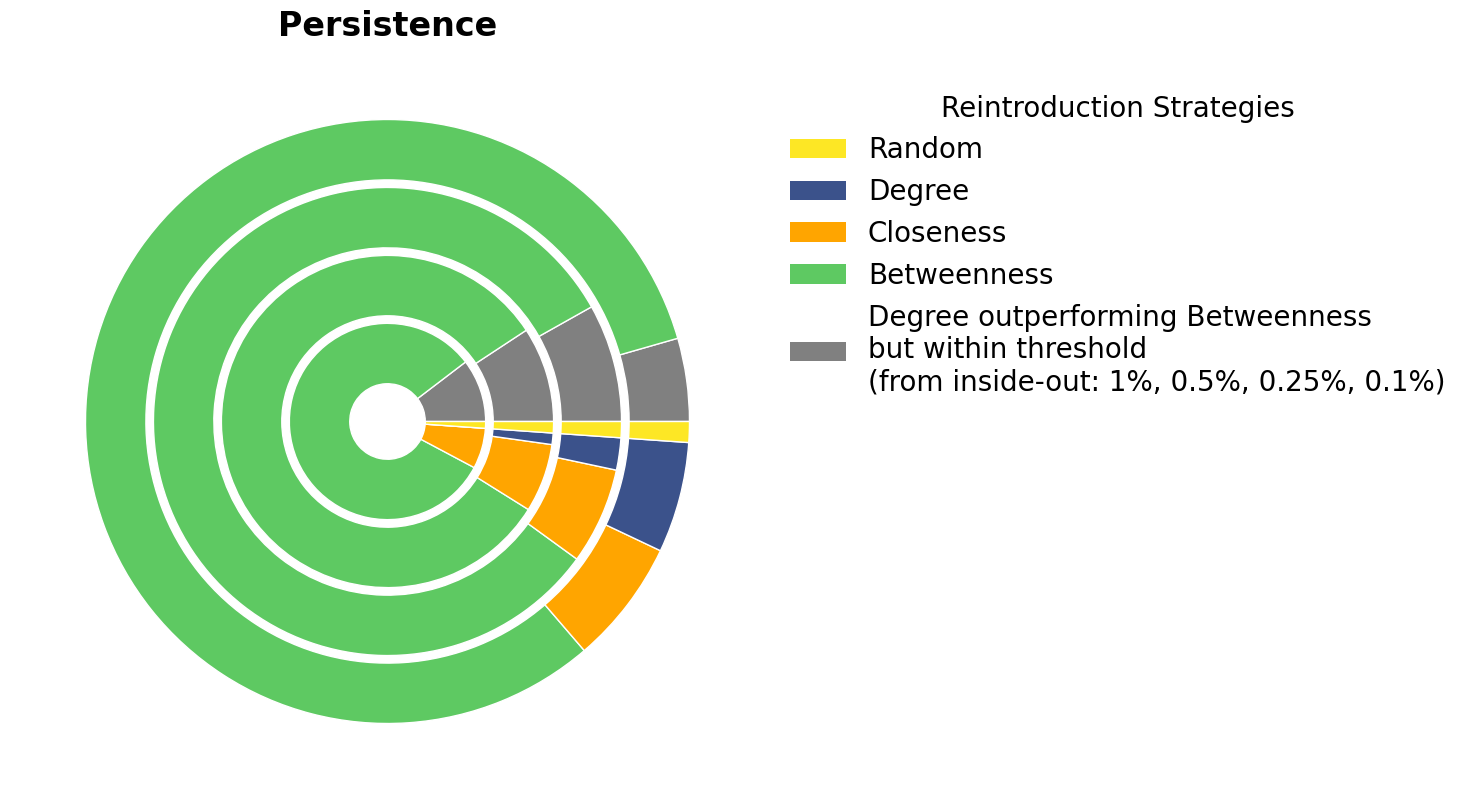

In [46]:
import matplotlib as mpl
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        rel_strategy_performance[row, col] = (np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][1][var][key])/D[NetworkName][3][var][key]))*100

def per_threshold(var, threshold = 1.0):
     X = [UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Final_Mask_Per_Real_1D.pkl')),
          UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '06_Figures', 'Final_Mask_Per_Real_2D.pkl'))]

     _, X_2d = X

     X_2d = X_2d[:,9*var:9*(var+1)]
     rows, cols = np.where(abs(rel_strategy_performance) <= threshold)
     mask = set([(rows[i],cols[i]) for i in range(len(rows))])

     # cnt = 0
     for row in range(30):
          for col in range(9):
               if (row,col) in mask:
                    if X_2d[row, col] in [1]:
                         X_2d[row, col] = 5
                         # cnt += 1
     # print(cnt)
     unique, counts = np.unique(X_2d, return_counts=True)
     X_2d_var = {i: counts[np.where(unique == i)[0][0]] if i in unique else 0 for i in range(6)}
     return X_2d_var

fig, ax = plt.subplots(1,1,figsize = (10,10), dpi = 100)
# X_2d_var = per_threshold(0, 1.0) # [1.0, 0.5, 0.25, 0.1]
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cmap = {i:mpl.cm.viridis(norm(i)) if i != 2 else 'orange' for i in range(5)}
cmap[5] = 'gray'
# key_order = [1,2,3,5,4]
key_order = [5, 3, 2, 1, 4]
V = 2
size = 0.2
prop_val_threshold = 5
wedges, texts = ax.pie(
     [per_threshold(V, 0.1)[i] for i in key_order], 
     # labels = key_order, 
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1,
     wedgeprops = dict(width = size, edgecolor = 'w')
     )
wedges, texts = ax.pie(
     [per_threshold(V, 0.25)[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1 - size - 0.025,
     wedgeprops = dict(width = size, edgecolor = 'w'),
     # labeldistance = 0.7,
     )
wedges, texts = ax.pie(
     [per_threshold(V, 0.5)[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1 - 2*size - 0.05,
     wedgeprops = dict(width = size, edgecolor = 'w'),
     # labeldistance = 0.7,
     )
wedges, texts = ax.pie(
     [per_threshold(V, 1.0)[i] for i in key_order], 
     # labels = key_order,  
     colors = [cmap[i] for i in key_order],
     startangle = 0,
     radius = 1 - 3*size - 0.075,
     wedgeprops = dict(width = size, edgecolor = 'w'),
     # labeldistance = 0.7,
     )

legend_elements = [
     Patch(facecolor=cmap[4], label='Random'),
     Patch(facecolor=cmap[1], label='Degree'),
     Patch(facecolor=cmap[2], label='Closeness'),
     Patch(facecolor=cmap[3], label='Betweenness'),
     Patch(facecolor=cmap[5], label='Degree outperforming Betweenness'+'\n'+'but within threshold'+'\n'+'(from inside-out: 1%, 0.5%, 0.25%, 0.1%)')
    ]
l1 = ax.legend(handles=legend_elements, bbox_to_anchor = [1.0,0.5], loc = 'lower left', title = 'Reintroduction Strategies', fontsize = 20, frameon = False, ncol = 1)
l1.get_title().set_fontsize(20)

Var_name = {0:'Abundance',1:'Settling Time',2:'Persistence'}
plt.title(Var_name[V], fontsize = 24, weight = 'bold')

# 241 70
# 223 66
# 182 60
# 104 42
# X_2d_var, [X_2d_var[i] for i in key_order], cmap

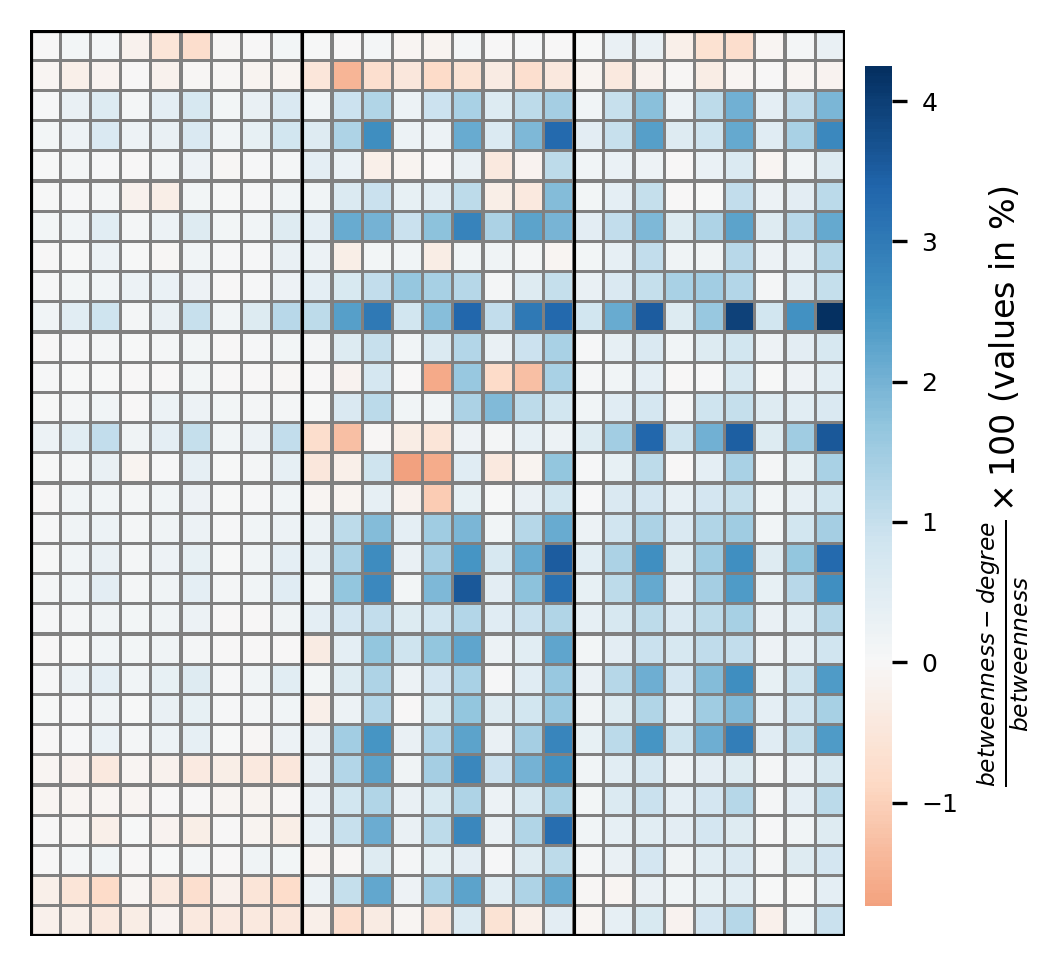

In [283]:
fig = plt.figure(dpi = 300)
fig.tight_layout(pad = 1)
ax = plt.gca()
# cbar_ax = fig.add_axes([.29, 0.1, .44, .015])
cbar_ax = fig.add_axes([0.75, 0.15, 0.015, 0.70])
g = sns.heatmap(
    rel_strategy_performance, 
    square = True, 
    cmap = 'RdBu', 
    center = 0.0, 
    ax = ax, 
    linecolor = 'gray', 
    linewidths=0.5,
    cbar_ax=cbar_ax,
    cbar_kws={
        'orientation':'vertical',
        'label':r'$\frac{betweenness - degree}{betweenness} \times $100 (values in %)',
        }
    )

ax.set_yticks([])
ax.set_xticks([])
cbar_ax.tick_params(labelsize = 6)
g.figure.axes[-1].yaxis.label.set_size(8)
ax.axvline(0, c = 'k', linewidth = 1.25)
ax.axvline(9, c = 'k', linewidth = 0.75)
ax.axvline(18, c = 'k', linewidth = 0.75)
ax.axvline(27, c = 'k', linewidth = 1.25)
ax.axhline(0, c = 'k', linewidth = 1.25)
ax.axhline(30, c = 'k', linewidth = 1.25)

plt.show()

In [ ]:
for NetworkName in itertools.islice(D.keys(),0,1,1):
    fig, ax = plt.subplots(1,3, figsize = (15,5), dpi = 300)
    fig.tight_layout(pad = 5)

    vals_x = lambda s: [((np.mean(D[NetworkName][s]['Abundance'][key]) - D_span['Abundance'][0])/(D_span['Abundance'][1] - D_span['Abundance'][0]))*100 for key in range(9)]
    vals_st = lambda s: [((D_span['Resilience'][1] - np.mean(D[NetworkName][s]['Resilience'][key]))/(D_span['Resilience'][1] - D_span['Resilience'][0]))*100 for key in range(9)]
    vals_p = lambda s: [((np.mean(D[NetworkName][s]['Persistence'][key]) - D_span['Persistence'][0])/(D_span['Persistence'][1] - D_span['Persistence'][0]))*100 for key in range(9)]


    ax[0].plot(np.arange(9),vals_x(1), label = 'Degree', c = 'blue', marker = 'o')
    ax[1].plot(np.arange(9),vals_st(1), label = 'Degree', c = 'blue', marker = 'o')
    ax[2].plot(np.arange(9),vals_p(1), label = 'Degree', c = 'blue', marker = 'o')

    ax[0].plot(np.arange(9),vals_x(2), label = 'Degree', c = 'orange', marker = 'o')
    ax[1].plot(np.arange(9),vals_st(2), label = 'Degree', c = 'orange', marker = 'o')
    ax[2].plot(np.arange(9),vals_p(2), label = 'Degree', c = 'orange', marker = 'o')

    ax[0].plot(np.arange(9),vals_x(3), label = 'Betweenness', c = 'green', marker = '^')
    ax[1].plot(np.arange(9),vals_st(3), label = 'Betweenness', c = 'green', marker = '^')
    ax[2].plot(np.arange(9),vals_p(3), label = 'Betweenness', c = 'green', marker = '^')

    ax[0].plot(np.arange(9),vals_x(4), label = 'Random', c = 'red', marker = '*')
    ax[1].plot(np.arange(9),vals_st(4), label = 'Random', c = 'red', marker = '*')
    ax[2].plot(np.arange(9),vals_p(4), label = 'Random', c = 'red', marker = '*')

    ax[0].set_ylabel(r'% performance of $Abundance$', fontsize = 16)
    ax[1].set_ylabel(r'% performance of $Settling \, Time$', fontsize = 16)
    ax[2].set_ylabel(r'% performance of $Persistence$', fontsize = 16)

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    # ax.legend([a,b,c], ['Degree', 'Betweenness', 'Random'])
    plt.suptitle(f"{NetworkName}")
    plt.show()

In [146]:
mean_strategy_performance = {}
for s in [1,3,4]:
    mean_strategy_performance[s] = []
    for var in ['Abundance','Resilience','Persistence']:
        for key in np.arange(9):
            temp = []
            for NetworkName in M_Real.keys():
                # temp.append(np.nanmean(D[NetworkName][s][var][key]))
                if var == 'Resilience':
                    temp.append(np.nanmin(D[NetworkName][s][var][key]))
                else:
                    temp.append(np.nanmax(D[NetworkName][s][var][key]))
            # mean_strategy_performance[s].append(np.nanmax(temp))
            if var == 'Resilience':
                mean_strategy_performance[s].append(np.nanmean(temp))
            else:
                mean_strategy_performance[s].append(np.nanmean(temp))
    mean_strategy_performance[s] = np.array(mean_strategy_performance[s])

In [148]:
mean_strategy_performance = {}
for s in [1,3,4]:
    mean_strategy_performance[s] = []
    for var in ['Abundance','Resilience','Persistence']:
        for key in np.arange(9):
            temp = []
            for NetworkName in M_Real.keys():
                temp.append(np.nanmean(D[NetworkName][s][var][key]))
                # if var == 'Resilience':
                #     temp.append(np.nanmax(D[NetworkName][s][var][key]))
                # else:
                #     temp.append(np.nanmin(D[NetworkName][s][var][key]))
            mean_strategy_performance[s].append(np.nanmax(temp))
            # if var == 'Resilience':
            #     mean_strategy_performance[s].append(np.nanmax(temp))
            # else:
            #     mean_strategy_performance[s].append(np.nanmin(temp))
    mean_strategy_performance[s] = np.array(mean_strategy_performance[s])

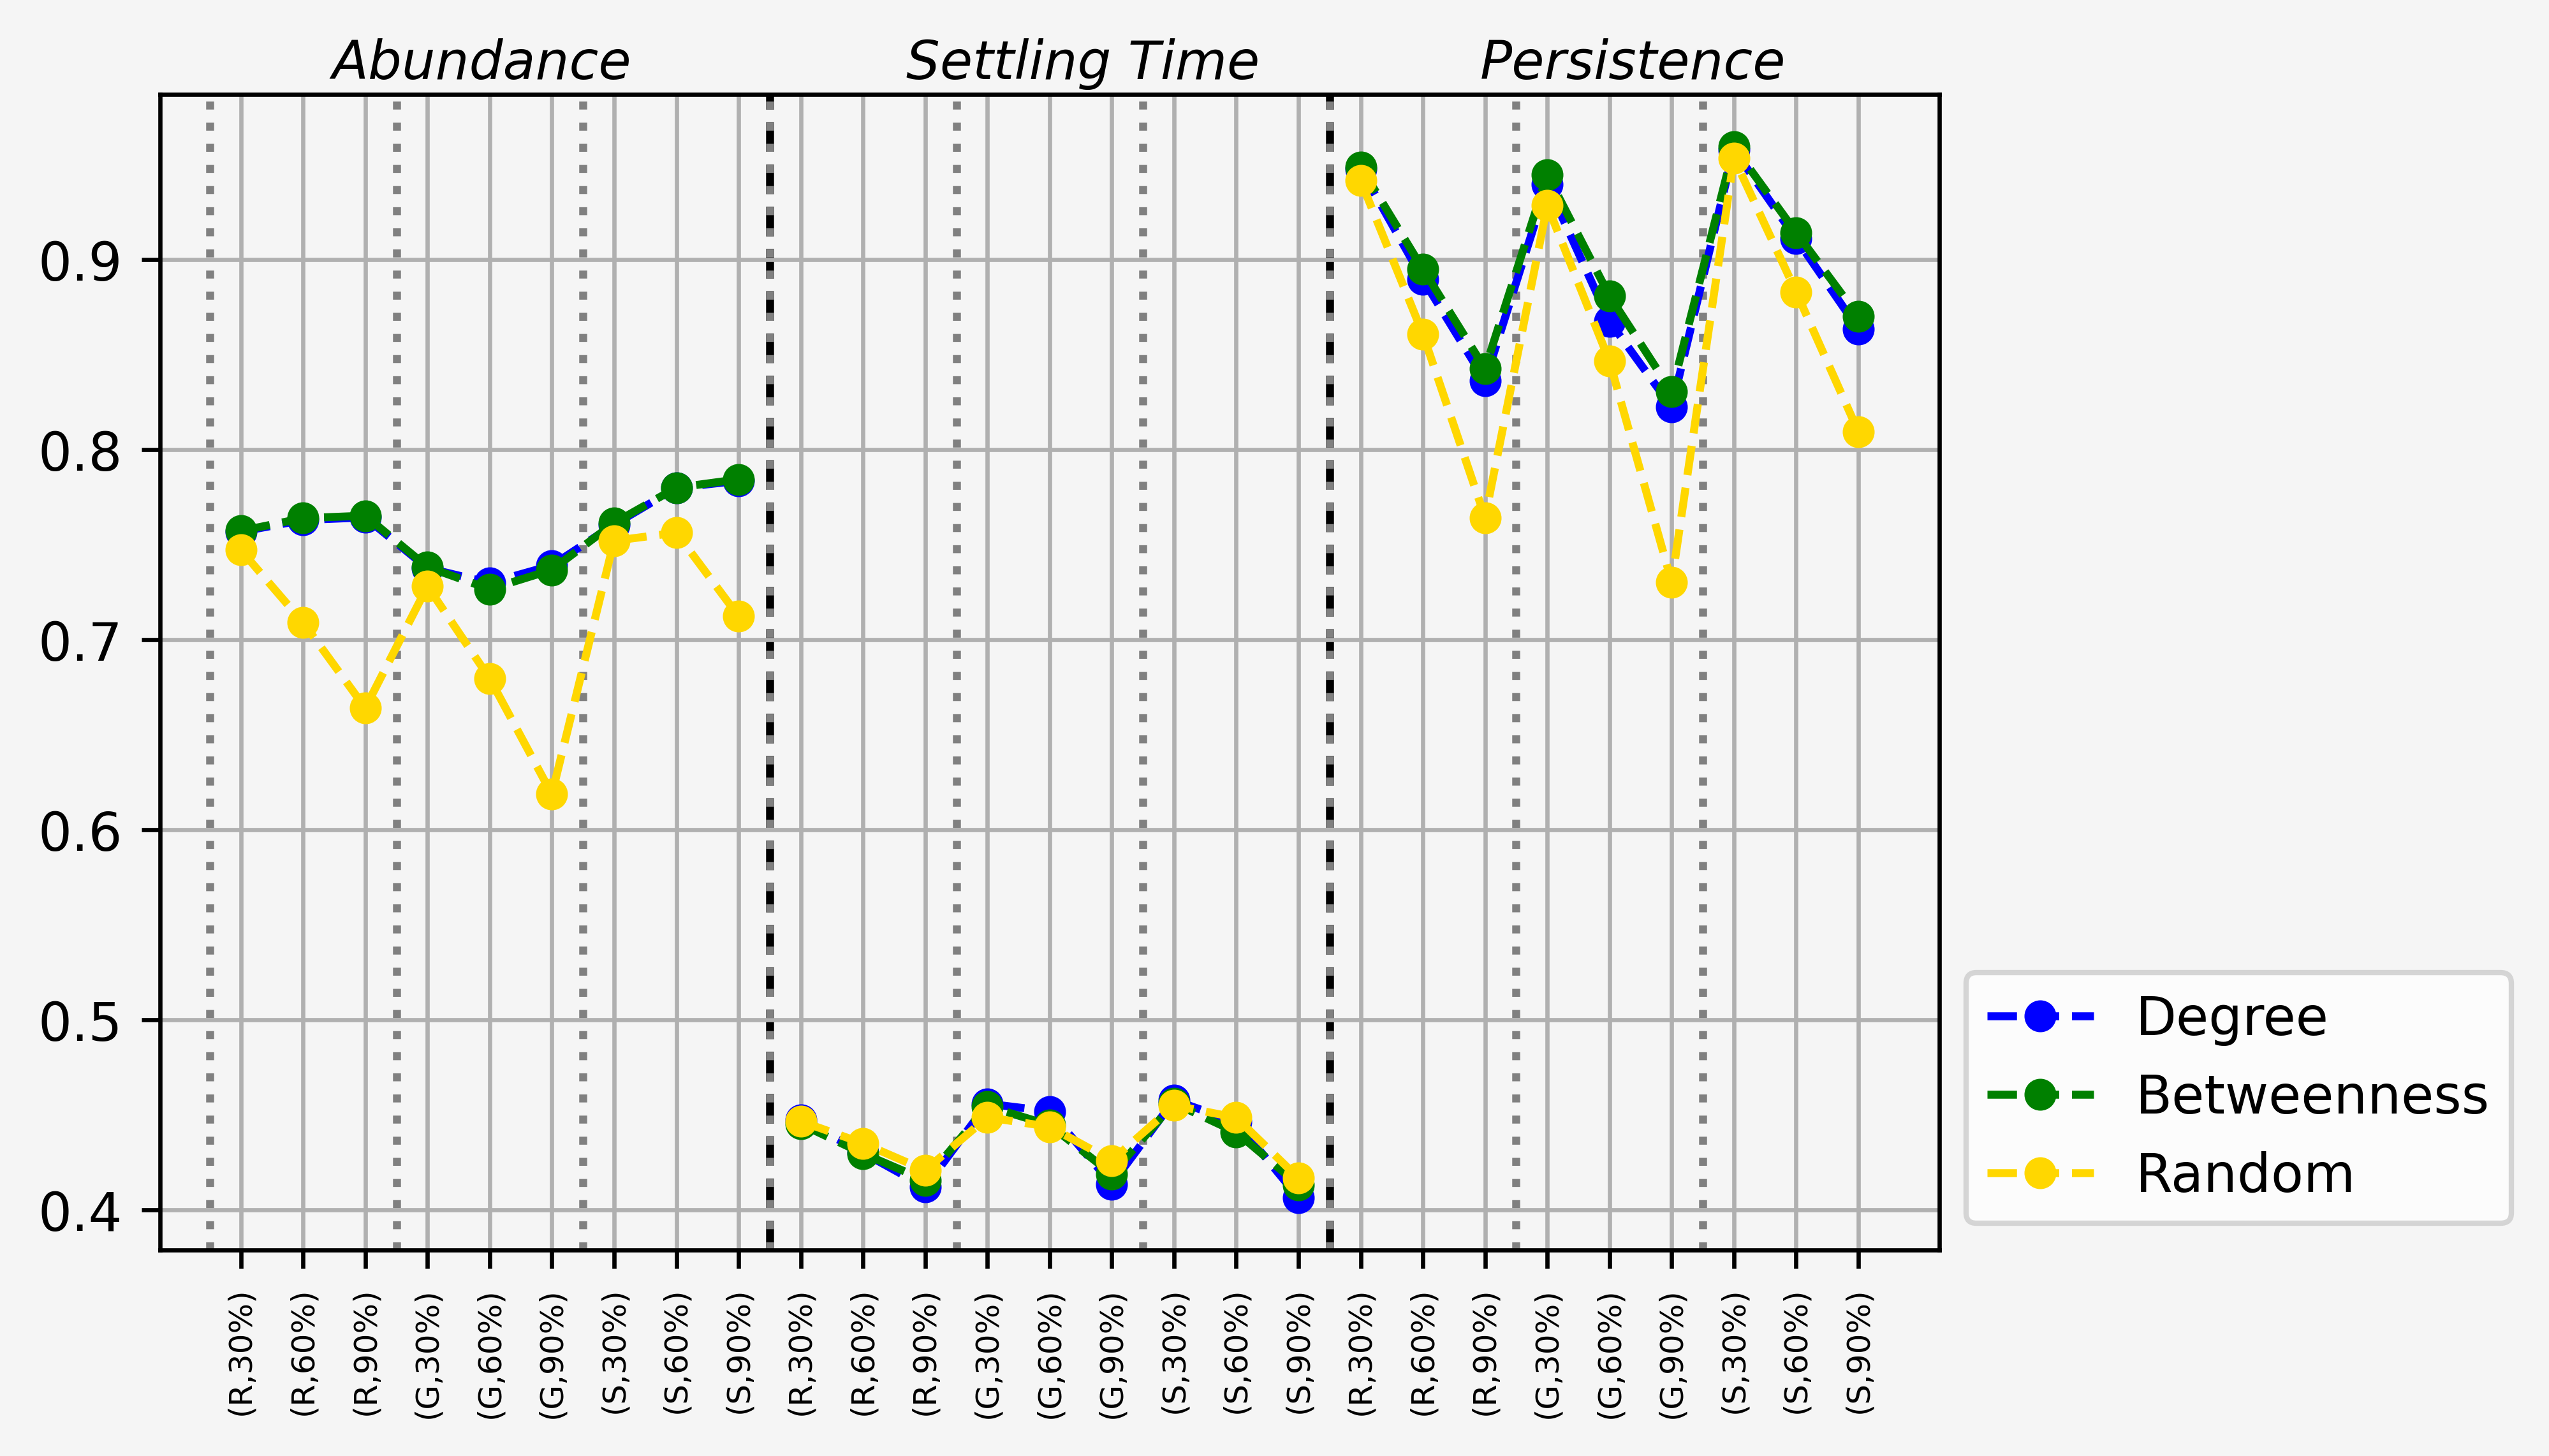

In [190]:
Strategy_Name = ['System','Degree','Closeness','Betweenness','Random']
c = {1:'blue', 3:'green', 4:'gold'}
fig = plt.figure(dpi = 600, facecolor = 'whitesmoke')
for v in range(3):
    for s in [1,3,4]:
        plt.plot(np.arange(v*9,(v+1)*9),mean_strategy_performance[s][v*9:(v+1)*9], label = Strategy_Name[s], c = c[s], marker = 'o', markersize = 5, linestyle = 'dashed')
plt.grid()
plt.legend(['Degree', 'Betweenness', 'Random'], bbox_to_anchor = (1.0,0.0), loc = 'lower left')
plt.axvline(9-0.5,0,1.0, c = 'k', linestyle = 'dashed', zorder = 0)
plt.axvline(18-0.5,0,1.0, c = 'k', linestyle = 'dashed', zorder = 0)

plt.axvline(0-0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(2+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(5+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)

plt.axvline(9+0-0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(9+2+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(9+5+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)

plt.axvline(18+0-0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(18+2+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)
plt.axvline(18+5+0.5,0,1.0, c = 'gray', linestyle = 'dotted', zorder = 0)

ax = plt.gca()
ax.set_xticks(np.arange(27))
ax.set_xticklabels([f"({xx},{yy}%)" for _ in range(3) for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 6)
ax.set_facecolor('whitesmoke')
fig.text(0.2,0.9, r'Abundance', style = 'italic', va='center', ha='left')
fig.text(0.45,0.9, r'Settling Time', style = 'italic', va='center', ha='left')
fig.text(0.7,0.9, r'Persistence', style = 'italic', va='center', ha='left')
plt.show()

In [194]:
print(mean_strategy_performance[1][0:9])
print(mean_strategy_performance[3][0:9])

[0.75687659 0.76299806 0.76437796 0.73768124 0.72989983 0.73911792
 0.76059354 0.77991776 0.78365513]
[0.75728369 0.76397237 0.76528799 0.73827313 0.72662074 0.7367851
 0.76145265 0.78001208 0.78443679]


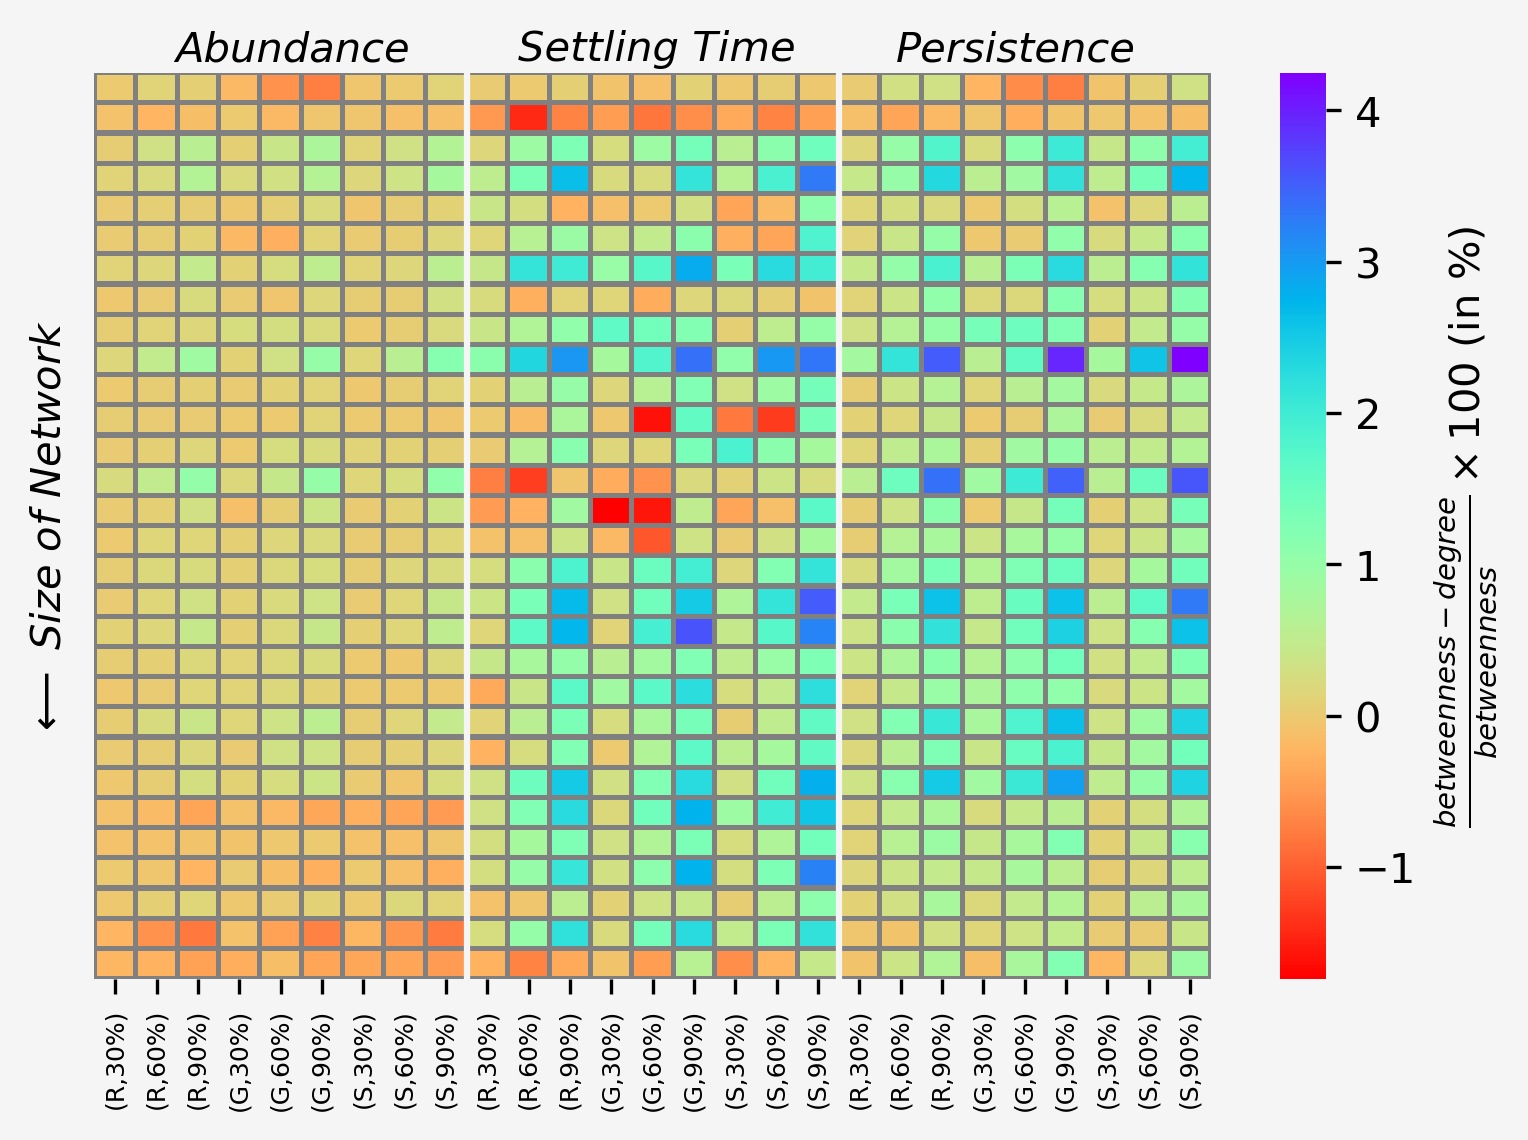

In [257]:
rel_strategy_performance = np.empty((30,27))
for row,NetworkName in itertools.islice(enumerate(M_Real.keys()),0,None,1):
    for col,(var, key) in enumerate(itertools.product(['Abundance','Resilience','Persistence'], np.arange(9))):
        # print(row, col, NetworkName, var, key)
        # print(D[NetworkName][s][var][key].shape)
        rel_strategy_performance[row, col] = np.nanmean((D[NetworkName][3][var][key] - D[NetworkName][1][var][key])/D[NetworkName][3][var][key])

fig = plt.figure(dpi = 300, facecolor='whitesmoke')
sns.heatmap(rel_strategy_performance*100, cmap = 'rainbow_r', linecolor = 'gray', linewidths=1, cbar_kws={'label':r'$\frac{betweenness - degree}{betweenness} \times 100$ (in %)'})
ax = plt.gca()
plt.axvline(9, c = 'whitesmoke')
plt.axvline(18, c = 'whitesmoke')
ax.set_yticks([])
ax.set_xticks(np.arange(27)+0.5)
ax.set_xticklabels([f"({xx},{yy}%)" for _ in range(3) for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 6)
fig.text(0.17,0.9, r'Abundance', style = 'italic', va='center', ha='left')
fig.text(0.36,0.9, r'Settling Time', style = 'italic', va='center', ha='left')
fig.text(0.57,0.9, r'Persistence', style = 'italic', va='center', ha='left')
fig.text(0.1,0.5, r'$\longleftarrow$ Size of Network', style = 'italic', va='center', ha='center', rotation = 90)
plt.show()

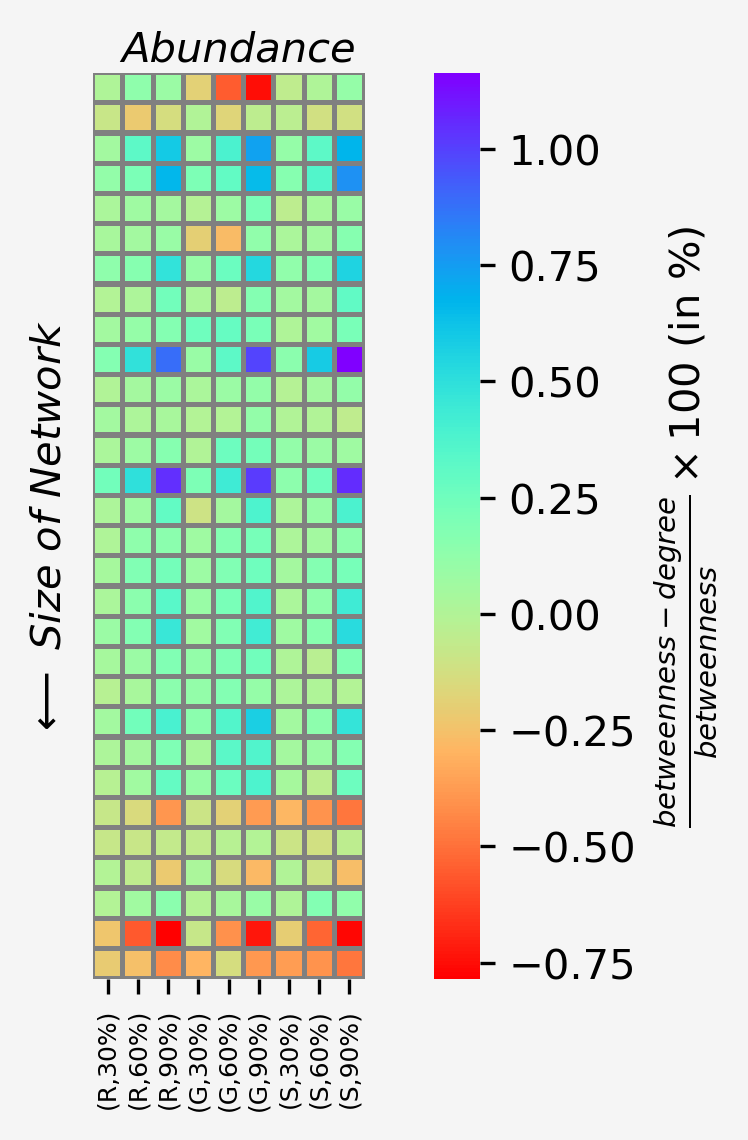

In [256]:
fig = plt.figure(dpi = 300, facecolor='whitesmoke')
sns.heatmap(rel_strategy_performance[:,0:9]*100, cmap = 'rainbow_r', linecolor = 'gray', linewidths=1, square = True, cbar_kws={'label':r'$\frac{betweenness - degree}{betweenness} \times 100$ (in %)'})
ax = plt.gca()
ax.set_yticks([])
ax.set_xticks(np.arange(9*1)+0.5)
ax.set_xticklabels([f"({xx},{yy}%)" for _ in range(1) for xx in ['R','G','S'] for yy in [30,60,90]], rotation = 90, fontsize = 6)
fig.text(0.61,0.9, r'Abundance', style = 'italic', va='center', ha='left')
# fig.text(0.36,0.9, r'Settling Time', style = 'italic', va='center', ha='left')
# fig.text(0.57,0.9, r'Persistence', style = 'italic', va='center', ha='left')
fig.text(0.57,0.5, r'$\longleftarrow$ Size of Network', style = 'italic', va='center', ha='center', rotation = 90)
plt.show()

In [ ]:
each_strategy_performance = {}
for s in [1,3,4]:
    each_strategy_performance[s] = []
    for var in ['Abundance','Resilience','Persistence']:
        for key in np.arange(9):
            temp = []
            for NetworkName in M_Real.keys():
                temp.append(np.nanmean(D[NetworkName][s][var][key]))
                # if var == 'Resilience':
                #     temp.append(np.nanmax(D[NetworkName][s][var][key]))
                # else:
                #     temp.append(np.nanmin(D[NetworkName][s][var][key]))
            mean_strategy_performance[s].append(np.nanmax(temp))
            # if var == 'Resilience':
            #     mean_strategy_performance[s].append(np.nanmax(temp))
            # else:
            #     mean_strategy_performance[s].append(np.nanmin(temp))
    mean_strategy_performance[s] = np.array(mean_strategy_performance[s])

# Others

In [ ]:
temp = []
for NetworkName in tqdm(M_Real.keys()):
    M_df = M_Real[NetworkName]
    # print(f"{NetworkName}: {M_df.shape}")
    # temp += [[NetworkName, sum(M_df.shape), M_df.shape[0], M_df.shape[1]]]
    data = get_Plot_data(NetworkName = NetworkName, CASE_TO_SOLVE = "Real_2D")
    temp_row = []
    for key in range(9):
        try:
            temp_cell = np.mean((np.array(data[3][data[3].key == key].Value) - np.array(data[1][data[1].key == key].Value))/(np.array(data[3][data[3].key == key].Value)))
        except:
            temp_cell = None
        temp_row.append(temp_cell)
    # print(f"{NetworkName}, {sum(M_df.shape)}, {[round(x,4) for x in temp_row]}")
    temp += [[NetworkName, sum(M_df.shape)]+temp_row]
    
temp = np.array(temp)
np.save(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', 'Updating_Panels', 'strategy_heatmap_01.npy'), temp)
df = pd.DataFrame(temp, columns=['NetworkName','Size']+[f"key_{key}" for key in range(9)])
df

In [ ]:
df1 = df.iloc[:,2:]
df1.columns = np.arange(9)
df1 = df1.astype(np.float64)
plt.figure(dpi = 300)
g = sns.heatmap(df1*100, cmap = 'viridis', square=True)
g.set_yticks([])
g.set_xticks(0.5 + np.arange(9))
g.set_xticklabels([f'({x},{y}%)' for x in ['R', 'G', 'S'] for y in [30,60,90]], rotation = 90, fontsize = 6)
g.set_title(r'$\frac{x-y}{x} \times 100$')
plt.show()

In [75]:
data[1]

,key,Var,Value
0,0,Abundance,0.440292
1,0,Abundance,0.432715
2,0,Abundance,0.416834
3,0,Abundance,0.440718
4,0,Abundance,0.421634
...,...,...,...
6745,8,Persistence,0.827778
6746,8,Persistence,0.827778
6747,8,Persistence,0.827778
6748,8,Persistence,0.827778
